## まとめ

* ニューラルネットワークでは活性化関数として、シグモイド関数やReLU関数のような滑らかに勾配が変化する関数を使用する
* Numpyの多次元配列を使用することで、ニューラルネットワークを効率よく実装することができる
* 機械学習の問題は、回帰問題と分類問題に大別できる
* 出力層で使用する活性化関数は、回帰問題では恒等関数、分類問題ではソフトマックス関数を一般的に利用する
* 分類問題では出力層のニューロンの数を分類するクラス数に設定する
* 入力データのまとまりをバッチといい、バッチ単位で推論処理を行うことで、計算を高速に行うことができる

In [2]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [9]:
from google.colab import drive
import sys,os

drive.mount('/content/drive')
ROOT_PATH = 'drive/My Drive/Colab Notebooks/zero_DL/deep-learning-from-scratch/'
sys.path.append(ROOT_PATH)
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定

Mounted at /content/drive


In [10]:
from dataset.mnist import load_mnist    #カスタムモジュールのインポート

In [11]:
import pickle

## 活性化関数

### ステップ関数

f(x) = 1 (x > 0 のとき)  
     = 0 (x <= 0 のとき)

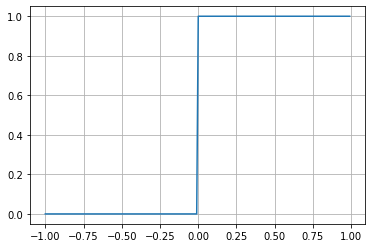

In [ ]:
#ステップ関数のグラフ表示
def step_function(x):
  return (x>0).astype(int)  #bool値をintに変換している

x=np.arange(-1,1,0.01)
y=step_function(x)
plt.figure(facecolor='w')
plt.plot(x,y)
plt.grid(True)
plt.show()

### シグモイド関数

f(x) = 1/(1+e^(-x))

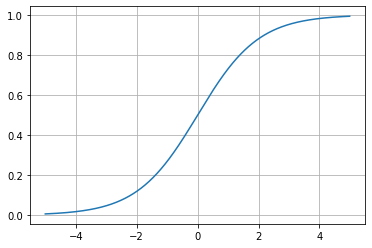

In [16]:
#シグモイド関数のグラフ表示
def sigmoid(x):
  return 1/(1+np.exp(-x))

x=np.arange(-5,5,0.01)
y=sigmoid(x)
plt.figure(facecolor='w')
plt.plot(x,y)
plt.grid(True)
plt.show()

### ReLU関数

f(x) = x (x > 0 のとき)  
      =　0 (x <= 0 のとき)

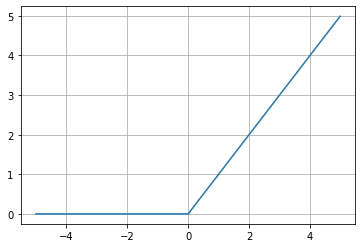

In [ ]:
#ReLU関数のグラフ表示
def relu(x):
  return np.maximum(0,x)

x=np.arange(-5,5,0.01)
y=relu(x)
plt.figure(facecolor='w')
plt.plot(x,y)
plt.grid(True)
plt.show()

### 行列の積を用いたニューラルネットワークの計算

In [ ]:
#行列の積でニューラルネットワークを計算する
X=np.array([1,2])
W=np.array([[1,3,5],[2,4,6]])
Y=np.dot(X,W)
print(Y)

[ 5 11 17]


## 3層のニューラルネットワークの実装


In [ ]:
#3層のニューラルネットワークの実装
def init_network():
  network={}
  network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  network['b1']=np.array([0.1,0.2,0.3])
  network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  network['b2']=np.array([0.1,0.2])
  network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
  network['b3']=np.array([0.1,0.2])

  return network

def forward(network,x):
  W1,W2,W3=network['W1'],network['W2'],network['W3']
  b1,b2,b3=network['b1'],network['b2'],network['b3']

  a1=np.dot(x,W1)+b1
  z1=sigmoid(a1)
  a2=np.dot(z1,W2)+b2
  z2=sigmoid(a2)
  a3=np.dot(z2,W3)+b3
  y=identify_function(a3)

  return y

network=init_network()
x=np.array([1.0,0.5])
y=forward(network,x)
print(y)

[0.31682708 0.69627909]


### 恒等関数

f(x) = x

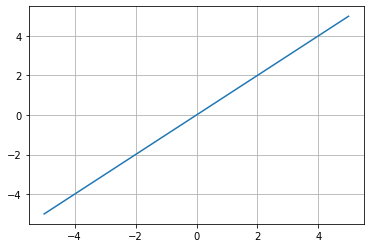

In [ ]:
#恒等関数の実装
def identify_function(x):
  return x

x=np.arange(-5,5,0.01)
y=identify_function(x)
plt.figure(facecolor='w')
plt.plot(x,y)
plt.grid(True)
plt.show()

### ソフトマックス関数

f(x) = e^x/Σe^x

* 出力は０から１までの実数値になる
* 出力の総和が１になるため、出力を確率として解釈できる
* 推論フェーズでは出力層のソフトマックス関数は省略されるのが一般的  
（計算コスト削減のため）

y.sum()= 1.0


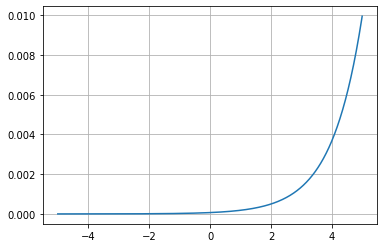

In [6]:
#ソフトマックス関数の実装
def soft_max(x):
  c=np.max(x)
  exp_x=np.exp(x-c)   #オーバーフロー対策で入力の最大値cを引く
  sum_exp_x=np.sum(exp_x)
  return exp_x/sum_exp_x

x=np.arange(-5,5,0.01)
y=soft_max(x)
print('y.sum()=',y.sum())
plt.figure(facecolor='w')
plt.plot(x,y)
plt.grid(True)
plt.show()

#### ソフトマックス関数使用時の注意点（オーバーフロー）

In [ ]:
x=np.array([1010,1000,990])

#オーバーフロー対策をしたソフトマックス関数
print(soft_max(x))
print(np.sum(soft_max(x)))
#オーバーフロー対策をしないソフトマックス関数
exp_x=np.exp(x)
sum_exp_x=np.sum(exp_x)
y=exp_x/sum_exp_x
print(y)

[9.99954600e-01 4.53978686e-05 2.06106005e-09]
1.0
[nan nan nan]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


## 手書き数字認識

### MNISTデータセット

5


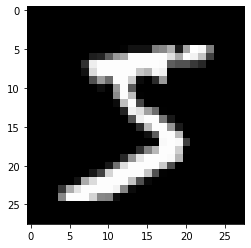

In [14]:
(x_train,t_train),(x_test,t_test)=\
  load_mnist(flatten=True,normalize=False)

img=x_train[0]
correct=t_train[0]
print(correct)
img=img.reshape(28,28)
plt.figure(facecolor='w')
plt.gray()
plt.imshow(img)
plt.show()

### ニューラルネットワークの推論処理

In [18]:
def get_data():
  (x_train,t_train),(x_test,t_test)=\
  load_mnist(flatten=True,normalize=False)

  return x_test,t_test

def init_network():
  with open(ROOT_PATH+'ch03/sample_weight.pkl','rb') as f:
    network=pickle.load(f)

    return network

def predict(network,x):
  W1,W2,W3=network['W1'],network['W2'],network['W3']
  b1,b2,b3=network['b1'],network['b2'],network['b3']

  a1=np.dot(x,W1)+b1
  z1=sigmoid(a1)
  a2=np.dot(z1,W2)+b2
  z2=sigmoid(a2)
  a3=np.dot(z2,W3)+b3
  y=soft_max(a3)

  return y

In [19]:
x,t=get_data()
print(x.shape)
network=init_network()
accuracy_cnt=0    #正解数
for i in range(len(x)):
  y=predict(network,x[i])
  p=np.argmax(y)
  if p==t[i]:   #予測と正解ラベルが同じならaccuracy_cntを＋１する
    accuracy_cnt+=1

print('Accuracy:'+str(float(accuracy_cnt)/len(x)))#正答率を表示

(10000, 784)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy:0.9207


### バッチ処理

In [22]:
x,t=get_data()
network=init_network()
batch_size=100
accuracy_cnt=0

for i in range(0,len(x),batch_size):    #range(start,stop,step)
  x_batch=x[i:i+batch_size] #i=0のときx[0:100],i=100のときx[100:200]
#   print(x_batch.shape)
  y_batch=predict(network,x_batch)
  p=np.argmax(y_batch,axis=1)
  accuracy_cnt+=np.sum(p==t[i:i+batch_size])

print('Accuracy:'+str(float(accuracy_cnt)/len(x)))#正答率を表示

Accuracy:0.9207


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
